<a href="https://colab.research.google.com/github/Roumyajit/My-Project-Data-Science/blob/main/Copy_of_FIFA_World_Cup_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0

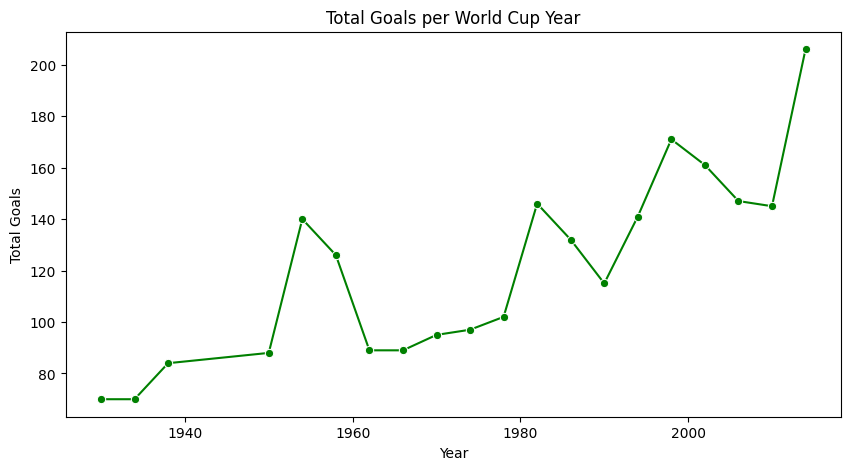

<ipython-input-1-08a6abd1524b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_goals_team.values, y=total_goals_team.index, palette='rocket')


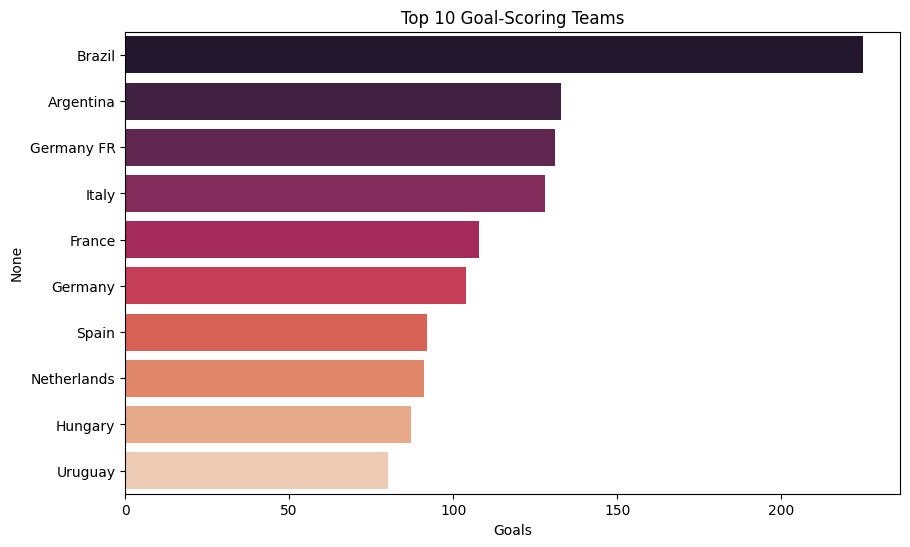

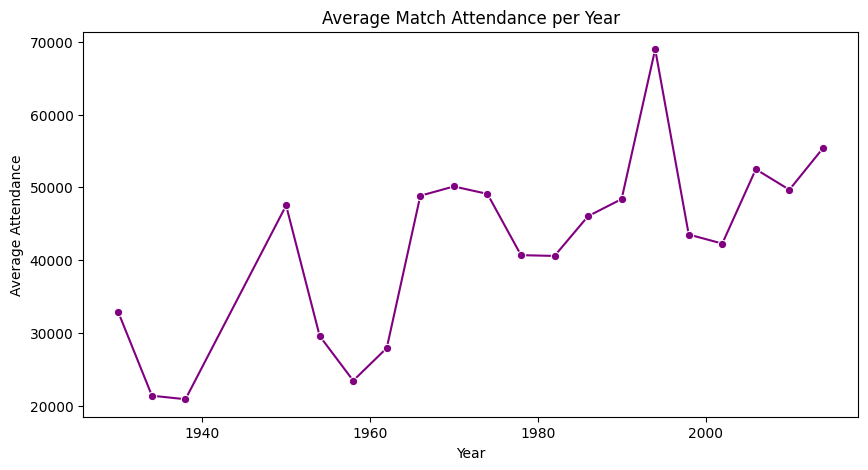

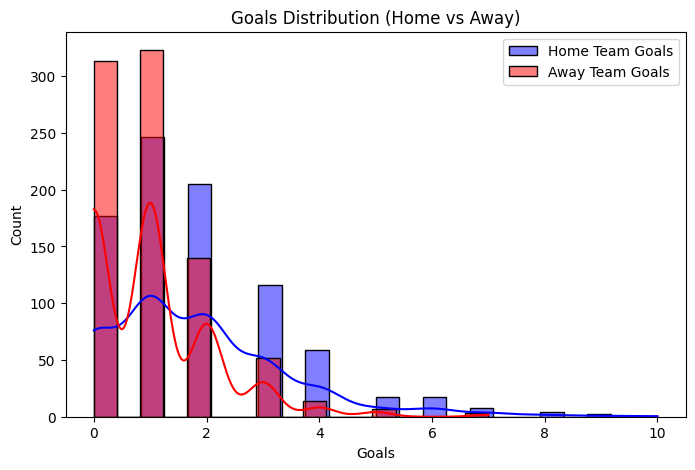

<ipython-input-1-08a6abd1524b>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette='crest')


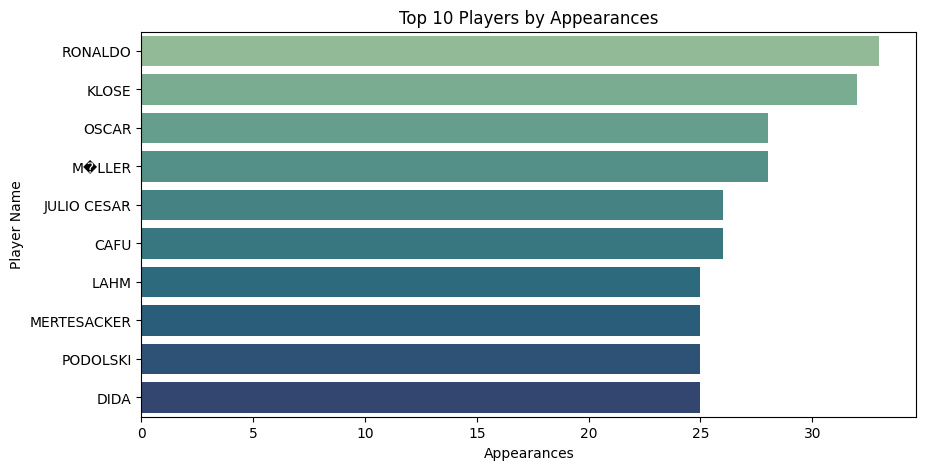

In [ ]:
# FIFA World Cup Data Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Load
matches = pd.read_csv('/content/WorldCupMatches.csv')
players = pd.read_csv('/content/WorldCupPlayers.csv')

# Clean column names
matches.columns = matches.columns.str.strip()
players.columns = players.columns.str.strip()

# Preview data
print(matches.head())
print(players.head())

# Total Goals per Year
matches['Total Goals'] = matches['Home Team Goals'] + matches['Away Team Goals']
goals_per_year = matches.groupby('Year')['Total Goals'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=goals_per_year.index, y=goals_per_year.values, marker='o', color='green')
plt.title('Total Goals per World Cup Year')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.show()

# Top Goal-Scoring Teams (Home + Away Goals)
home_goals = matches.groupby('Home Team Name')['Home Team Goals'].sum()
away_goals = matches.groupby('Away Team Name')['Away Team Goals'].sum()
total_goals_team = (home_goals + away_goals).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=total_goals_team.values, y=total_goals_team.index, palette='rocket')
plt.title('Top 10 Goal-Scoring Teams')
plt.xlabel('Goals')
plt.show()

# Match Attendance Trend
attendance_per_year = matches.groupby('Year')['Attendance'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=attendance_per_year.index, y=attendance_per_year.values, marker='o', color='purple')
plt.title('Average Match Attendance per Year')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.show()

# Home vs Away Goals Distribution
plt.figure(figsize=(8,5))
sns.histplot(matches['Home Team Goals'], color='blue', label='Home Team Goals', kde=True)
sns.histplot(matches['Away Team Goals'], color='red', label='Away Team Goals', kde=True)
plt.title('Goals Distribution (Home vs Away)')
plt.xlabel('Goals')
plt.legend()
plt.show()

# Top Players by Appearances
top_players = players['Player Name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_players.values, y=top_players.index, palette='crest')
plt.title('Top 10 Players by Appearances')
plt.xlabel('Appearances')
plt.show()